In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_palette('hls')

(0.0, 6.283185307179586, 0.0, 3.15)

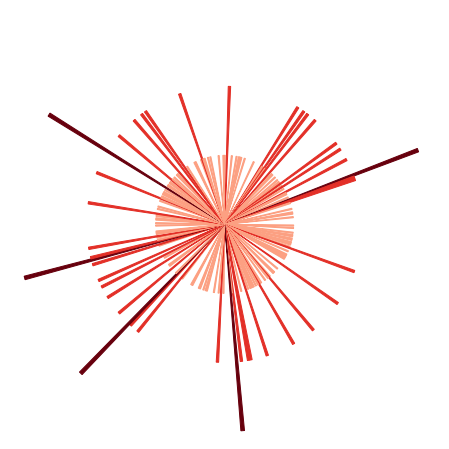

In [68]:
degrees = np.random.randint(0, 360, size=200)
radians = np.deg2rad(degrees)

bin_size = 1
a, b = np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

norm = plt.Normalize(0, max(a))
colors = plt.cm.Reds(norm(a))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
bars = ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0)
for idx, bar in enumerate(bars):
    bar.set_color(colors[idx])
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.axis('off')

In [66]:
def fig2Image(fig):
    fig.canvas.draw()
    w, h = fig.canvas.get_width_height()
    buffer = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)
    buffer.shape = (w, h, 4)
    buffer = np.roll(buffer, 3, axis=2)
    return Image.frombytes('RGBA', (w, h), buffer.tostring())

In [67]:
img = fig2Image(fig)
img.show()

/home/zal/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.
